## Data Processing Functions

#### `remove_bg`

In [187]:
# --- Imports

# from rembg import remove
# from PIL import Image
# import numpy as np

# --- Function

def remove_bg(im):  
    image = Image.open(im)
    output = remove(image)
    return np.array(output)
    #output.show()

In [188]:
# --- Unit Tests

# Exercise functionality
remove_1 = remove_bg('/Applications/DermaML/5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg')


#### `hand_outline`

In [217]:
# --- Imports

# import cv2
# import glob
# import torch
# import numpy as np
# from PIL import Image
# from matplotlib import pyplot as plt

# --- Function
 
def hand_outline(im):

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Apply edge detection to find the border
    edges = cv2.Canny(gray, 0,30)

    # Dilate the edges to connect any gaps
    dilated_edges = cv2.dilate(edges, None, iterations=5)

    # dilated_ims.append(dilated_edges)

    gray = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR)

    # Define the lower and upper thresholds for purple and yellow intensities
    lower_purple = 100
    upper_purple = 150
    lower_yellow = 160
    upper_yellow = 210

    # Create masks for purple and yellow intensities
    purple_mask = cv2.inRange(gray, lower_purple, upper_purple)
    yellow_mask = cv2.inRange(gray, lower_yellow, upper_yellow)

    # Find contours for purple and yellow regions
    if cv2.__version__.startswith('4'):
        contours, _ = cv2.findContours(purple_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        purple_contours = contours
        contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        yellow_contours = contours
    else:
        _, purple_contours, _ = cv2.findContours(purple_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        _, yellow_contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the image
    cv2.drawContours(gray, purple_contours, -1, (255, 0, 0), thickness=2)
    cv2.drawContours(gray, yellow_contours, -1, (0, 255, 255), thickness=2)

    # Find the centroids of the contours
    if len(purple_contours) > 0:
        purple_centroid = np.mean([c[0] for c in purple_contours], axis=0)
        purple_centroid = purple_centroid.astype(int)
    if len(yellow_contours) > 0:
        yellow_centroid = np.mean([c[0] for c in yellow_contours], axis=0)
        yellow_centroid = yellow_centroid.astype(int)

    # Draw a line connecting the centroids
    if len(purple_contours) > 0 and len(yellow_contours) > 0:
        cv2.line(gray, tuple(purple_centroid), tuple(yellow_centroid), (0, 255, 0), thickness=2)

    plt.imshow(gray)

    return gray

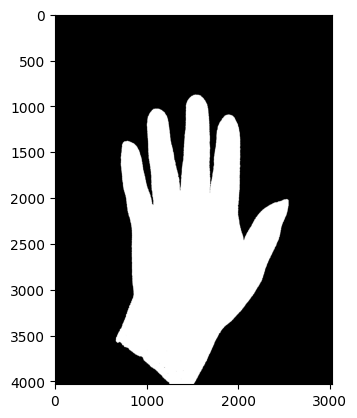

In [218]:
# --- Unit Tests

# Exercise functionality
outline_1 = hand_outline(remove_1)

#### `vgg16`

In [241]:
# --- Imports

from tensorflow.keras.applications.vgg16 import VGG16

# --- Function

vg_model = VGG16(weights='imagenet', include_top=False)

# Load and preprocess the image
def vgg16(im):
    x = image.img_to_array(im)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Extract features from the image
    vg_features = vg_model.predict(x)

    # Flatten or pool the features
    vg_flattened_features = vg_features.flatten()

    # Normalize the feature vector
    vg_normalized_features = vg_flattened_features / np.linalg.norm(vg_flattened_features)

    print(vg_normalized_features.shape)

In [242]:
# --- Unit Tests

# Exercise functionality
vgg16(outline_1)

1/1 [==============================] - 18s 18s/step
(6064128,)
